<a href="https://colab.research.google.com/github/saiachanta21/HolidayEnjoyment.github.io/blob/main/Heart%20Disease%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
#Authors:Sai Krishna Achanta
#Objective: To find the optimal k value
#Input: Dataset
#Output: Accuracy
import pandas as pd #data analysis toolkit
import matplotlib.pyplot as plt #for plotting graphs 
import numpy as np #high level computations matplotlib inline

In [49]:
from sklearn.preprocessing import StandardScaler #standardization of values
from sklearn.preprocessing import MinMaxScaler #normalization of values
from sklearn.model_selection import train_test_split #to split data
from sklearn.neighbors import KNeighborsClassifier #KNN classifier
from sklearn.metrics import confusion_matrix,accuracy_score #to get confusion matrix and accuracy
from sklearn.model_selection import cross_val_score #to perform evaluation and cross-validation

In [50]:
data_set = pd.read_csv("/content/framingham (1).csv") # dataset_input

In [51]:
# getting some info about data set
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   Chest Pain Type  4240 non-null   int64  
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   int64  
 5   BPMeds           4240 non-null   int64  
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4240 non-null   int64  
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   int64  
 14  glucose          4240 non-null   int64  
 15  target           4240 non-null   int64  
dtypes: float64(3), int64(13)
memory usage: 530.1 KB


In [52]:
data_set=data_set.fillna (data_set.mean()) # mean for missing data

In [53]:
data_set=np.round(data_set, decimals=2) # rouding all values in dataset to 2 decimal places
data_set.head() # first 5 values in dataset

,Sex,age,Chest Pain Type,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,target
0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0


In [54]:
data_set.tail()

,Sex,age,Chest Pain Type,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,target
4235,0,48,2,1,20,0,0,0,0,248,131.0,72.0,22.00,84,86,0
4236,0,44,1,1,15,0,0,0,0,210,126.5,87.0,19.16,86,0,0
4237,0,52,2,0,0,0,0,0,0,269,133.5,83.0,21.47,80,107,0
4238,1,40,3,0,0,0,0,1,0,185,141.0,98.0,25.60,67,72,0
4239,0,39,3,1,30,0,0,0,0,196,133.0,86.0,20.91,85,80,0


In [55]:
# no of rows and columns in the data set
data_set.shape

(4240, 16)

In [56]:
#checking for missing values
data_set.isnull().sum  #False means no missing data

<bound method NDFrame._add_numeric_operations.<locals>.sum of         Sex    age  Chest Pain Type  currentSmoker  cigsPerDay  BPMeds  \
0     False  False            False          False       False   False   
1     False  False            False          False       False   False   
2     False  False            False          False       False   False   
3     False  False            False          False       False   False   
4     False  False            False          False       False   False   
...     ...    ...              ...            ...         ...     ...   
4235  False  False            False          False       False   False   
4236  False  False            False          False       False   False   
4237  False  False            False          False       False   False   
4238  False  False            False          False       False   False   
4239  False  False            False          False       False   False   

      prevalentStroke  prevalentHyp  diabetes  to

In [57]:
#Statistical measure about the dataset
data_set.describe()

,Sex,age,Chest Pain Type,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,target
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.930425,0.494104,8.944340,0.029245,0.005896,0.310613,0.025708,233.908255,132.354599,82.897759,25.685184,75.861085,74.463208,0.151887
std,0.495027,8.572942,1.053026,0.500024,11.904777,0.168513,0.076569,0.462799,0.158280,51.166237,22.033300,11.910394,4.420501,12.080265,32.862256,0.358953
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83.500000,48.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,117.000000,75.000000,23.050000,68.000000,68.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.000000,128.000000,82.000000,25.380000,75.000000,77.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [58]:
#counting the  no of people's having Heart Disease ('1') and not having Heart Disease 
data_set['target'].value_counts()

0    3596
1     644
Name: target, dtype: int64

splitting the features and target

In [59]:
X = data_set.drop(columns='target',axis=1)
Y = data_set['target']

In [60]:
print(X)

      Sex  age  Chest Pain Type  currentSmoker  cigsPerDay  BPMeds  \
0       1   39                4              0           0       0   
1       0   46                2              0           0       0   
2       1   48                1              1          20       0   
3       0   61                3              1          30       0   
4       0   46                3              1          23       0   
...   ...  ...              ...            ...         ...     ...   
4235    0   48                2              1          20       0   
4236    0   44                1              1          15       0   
4237    0   52                2              0           0       0   
4238    1   40                3              0           0       0   
4239    0   39                3              1          30       0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0      195  106.0   70.0  26.97   
1

In [61]:
print(Y)

0       0
1       0
2       0
3       1
4       0
       ..
4235    0
4236    0
4237    0
4238    0
4239    0
Name: target, Length: 4240, dtype: int64


In [62]:
dset_modified = data_set.drop('target',axis=1)#dataset without class feature

In [63]:
data_set_feat = pd.DataFrame(dset_modified,columns=data_set.columns[:-1])#dataset without class feature

In [64]:
data_set_feat = np.round(data_set_feat,decimals=2)#rouding all values to  2 decimal places

In [65]:
one_train, one_test, two_train, two_test = train_test_split(data_set_feat,data_set['target'],test_size=0.30) #test_train split with test size =30% and train size =70%

In [66]:
#Computation of accuary ratess for varies neighbour values
Accurate_rates =[]

for i in range(1,40):
  k_nearst_neighbour = KNeighborsClassifier(n_neighbors=i)
  final_score=cross_val_score(k_nearst_neighbour,data_set_feat,data_set['target'],cv=5)
  Accurate_rates.append(final_score.mean())

Text(0, 0.5, 'Accuracy Rate')

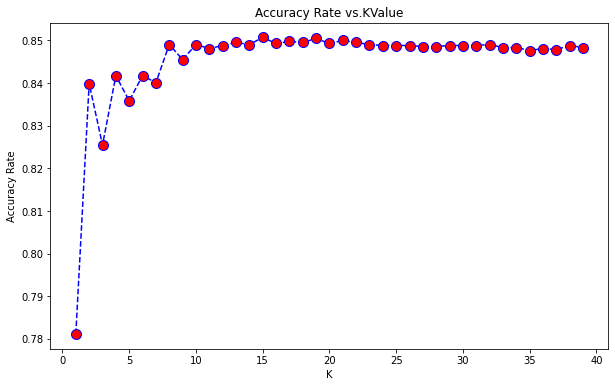

In [67]:
#plot
plt.figure(figsize=(10,6))
plt.plot(range(1,40),Accurate_rates,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Accuracy Rate vs.KValue')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [68]:
max_index = Accurate_rates.index(max(Accurate_rates))
k_nearest_neighbour = KNeighborsClassifier(n_neighbors=max_index)
k_nearest_neighbour.fit(one_test,two_test)
prediction = k_nearest_neighbour.predict(one_test)

print('For K',max_index)
print('Confusion matrix:')
print('\n')
print(confusion_matrix(two_test,prediction)) #Confusion Matrix
print('\n')
print('Acuuracy rate:',round(accuracy_score(two_test,prediction),2)*100,'%')
#Accuracy rate

For K 14
Confusion matrix:


[[1065    0]
 [ 207    0]]


Acuuracy rate: 84.0 %


In [69]:
t = 20 #Random K value

k_nearest_neighbour = KNeighborsClassifier(n_neighbors=t)
k_nearest_neighbour.fit(one_train,two_train)
prediction = k_nearest_neighbour.predict(one_test)

print('For K',t)
print('Confusion matrix:')
print('\n')
print(confusion_matrix(two_test,prediction)) #Confusion Matrix
print('\n')
print('Acuuracy rate:',round(accuracy_score(two_test,prediction),2)*100,'%')
#Accuracy rate

For K 20
Confusion matrix:


[[1064    1]
 [ 204    3]]


Acuuracy rate: 84.0 %


In [70]:
scaled = MinMaxScaler() #function MinMax scaler for normalisting values

In [71]:
scaled.fit(data_set.drop('target',axis=1)) #dropping class-feature

MinMaxScaler()

In [72]:
dset_modified = scaled.transform(data_set.drop('target',axis=1))#dropping class-feature

In [73]:
data_set_feat = pd.DataFrame(dset_modified,columns=data_set.columns[:-1])# dropping class-feature

In [74]:
data_set_feat = np.round(data_set_feat,decimals=2)#rouding all values to  2 decimal places
data_set_feat.head() #dataset_after_normalization

,Sex,age,Chest Pain Type,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,0.18,1.00,0.0,0.00,0.0,0.0,0.0,0.0,0.28,0.11,0.23,0.47,0.56,0.20
1,0.0,0.37,0.50,0.0,0.00,0.0,0.0,0.0,0.0,0.36,0.18,0.35,0.51,0.66,0.19
2,1.0,0.42,0.25,1.0,0.29,0.0,0.0,0.0,0.0,0.35,0.21,0.34,0.45,0.52,0.18
3,0.0,0.76,0.75,1.0,0.43,0.0,0.0,1.0,0.0,0.32,0.31,0.50,0.50,0.45,0.26
4,0.0,0.37,0.75,1.0,0.33,0.0,0.0,0.0,0.0,0.41,0.22,0.38,0.41,0.59,0.22


In [75]:
one_train, one_test, two_train, two_test = train_test_split(data_set_feat,data_set['target'],test_size=0.30) #test_train split with test size =30% and train size =70%

In [76]:
Accurate_rates =[]

for i in range(1,40):
  k_nearst_neighbour = KNeighborsClassifier(n_neighbors=i)
  final_score=cross_val_score(k_nearst_neighbour,data_set_feat,data_set['target'],cv=5)
  Accurate_rates.append(final_score.mean())

Text(0, 0.5, 'Accuracy Rate')

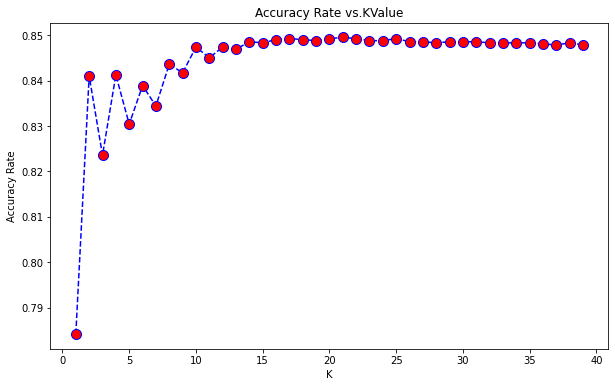

In [77]:
plt.figure(figsize=(10,6)) 
plt.plot(range(1,40),Accurate_rates,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10) 
plt.title('Accuracy Rate vs.KValue') 
plt.xlabel('K') 
plt.ylabel('Accuracy Rate')